In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the dataset
dataset = pd.read_csv('Game Behavior and Spending.csv')

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Remove leading and trailing whitespaces from all string columns
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Preprocess and one-hot encode the 'Gaming_Platforms' column
dataset['Gaming_Platforms'] = dataset['Gaming_Platforms'].str.lower()
dataset['Gaming_Platforms'] = dataset['Gaming_Platforms'].replace(' ', '')
one_hot_encoded_gaming_platforms  = dataset['Gaming_Platforms'].str.get_dummies(',')

# Preprocess and one-hot encode the 'Weekly_Gaming_Hours' column
dataset['Weekly_Gaming_Hours'] = dataset['Weekly_Gaming_Hours'].str.lower()
dataset['Weekly_Gaming_Hours'] = dataset['Weekly_Gaming_Hours'].replace(' ', '')
one_hot_encoded_weekly_gaming_hours  = dataset['Weekly_Gaming_Hours'].str.get_dummies(',')

# Preprocess and one-hot encode the 'Played_Games' column
dataset['Played_Games'] = dataset['Played_Games'].str.lower()
dataset['Played_Games'] = dataset['Played_Games'].replace(' ', '')
one_hot_encoded_played_games  = dataset['Played_Games'].str.get_dummies(',')

# Get the number of columns for each one-hot encoded DataFrame
one_hot_encoded_gaming_platforms_num_columns = one_hot_encoded_gaming_platforms.shape[1]
one_hot_encoded_weekly_gaming_hours_num_columns = one_hot_encoded_weekly_gaming_hours.shape[1]
one_hot_encoded_played_games_num_columns = one_hot_encoded_played_games.shape[1]

# Get the column names for each one-hot encoded DataFrame
one_hot_encoded_gaming_platforms_columns = one_hot_encoded_gaming_platforms.columns.tolist()
one_hot_encoded_weekly_gaming_hours_columns = one_hot_encoded_weekly_gaming_hours.columns.tolist()
one_hot_encoded_played_games_columns = one_hot_encoded_played_games.columns.tolist()

# Get the maximum length of comma-separated values for each column
one_hot_encoded_gaming_platforms_max_length = dataset['Gaming_Platforms'].apply(lambda x: len(str(x).split(','))).max()
one_hot_encoded_weekly_gaming_hours_max_length = dataset['Weekly_Gaming_Hours'].apply(lambda x: len(str(x).split(','))).max()
one_hot_encoded_played_games_max_length = dataset['Played_Games'].apply(lambda x: len(str(x).split(','))).max()

# Concatenate the one-hot encoded DataFrames to create the feature matrix X
features = pd.concat([one_hot_encoded_gaming_platforms, one_hot_encoded_weekly_gaming_hours, one_hot_encoded_played_games], axis=1)

# Use the LabelEncoder to transform the values in the second column ('Gaming_Platforms') of the dataset
target_variable = label_encoder.fit_transform(dataset.iloc[:, 1].values)

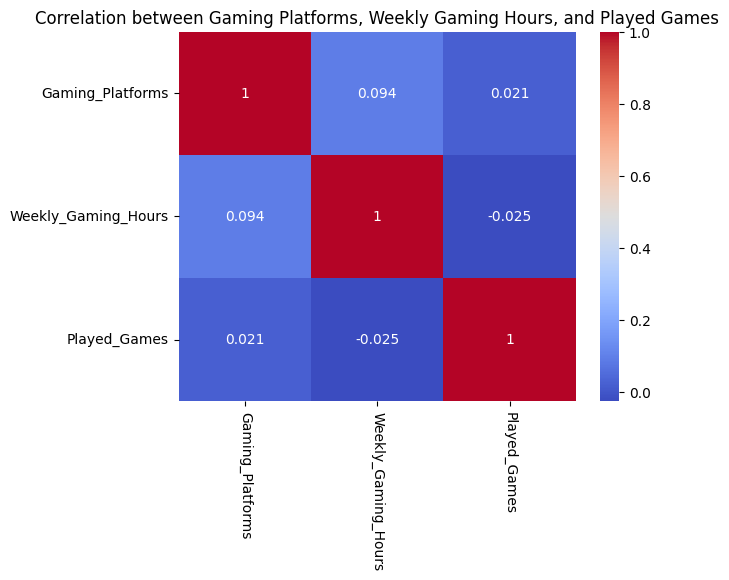

In [3]:
# Create a heatmap for the correlation between gaming platforms, Weekly Gaming Hours, and Played Games
corr = dataset[['Gaming_Platforms', 'Weekly_Gaming_Hours', 'Played_Games']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')
plt.title('Correlation between Gaming Platforms, Weekly Gaming Hours, and Played Games')
plt.xticks(rotation=-90)
plt.show()

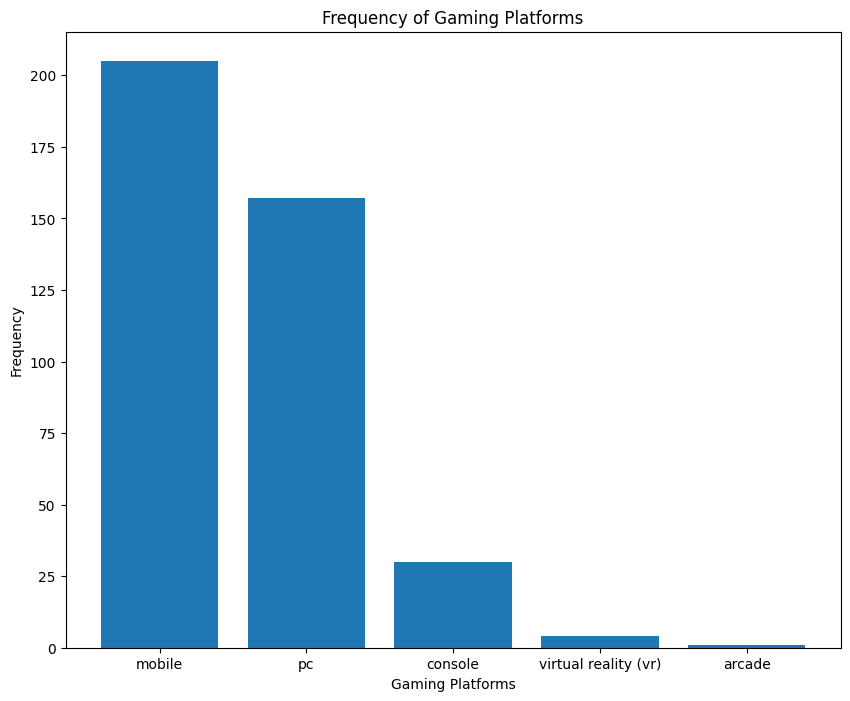

In [4]:
# Count the frequency of gaming platforms
gaming_platforms = dataset['Gaming_Platforms'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for gaming platforms
plt.figure(figsize=(10, 8))
plt.bar(gaming_platforms.index, gaming_platforms.values)
plt.title('Frequency of Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Frequency')
plt.show()

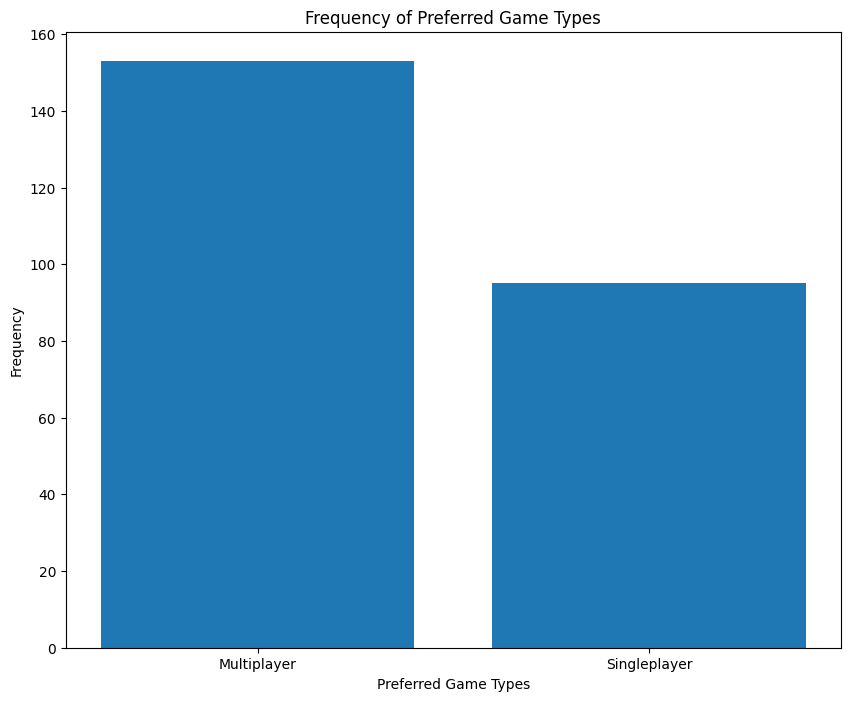

In [5]:
# Count the frequency of preferred game types
preferred_game_types = dataset['Preferred_Game_Type'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred game types
plt.figure(figsize=(10, 8))
plt.bar(preferred_game_types.index, preferred_game_types.values)
plt.title('Frequency of Preferred Game Types')
plt.xlabel('Preferred Game Types')
plt.ylabel('Frequency')
plt.show()

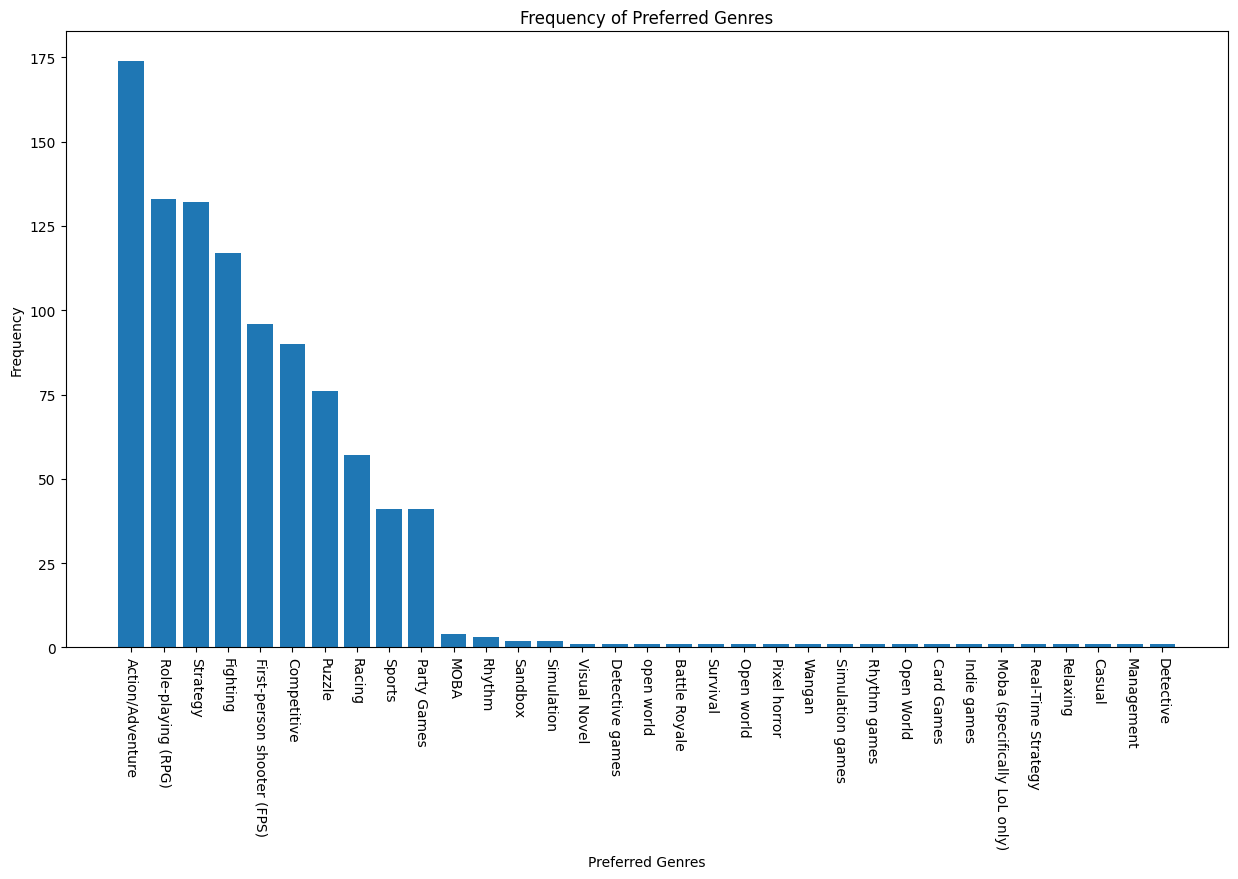

In [6]:
# Count the frequency of preferred genres
preferred_genres = dataset['Preferred_Genres'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred genres
plt.figure(figsize=(15, 8))
plt.bar(preferred_genres.index, preferred_genres.values)
plt.title('Frequency of Preferred Genres')
plt.xlabel('Preferred Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=-90)
plt.show()

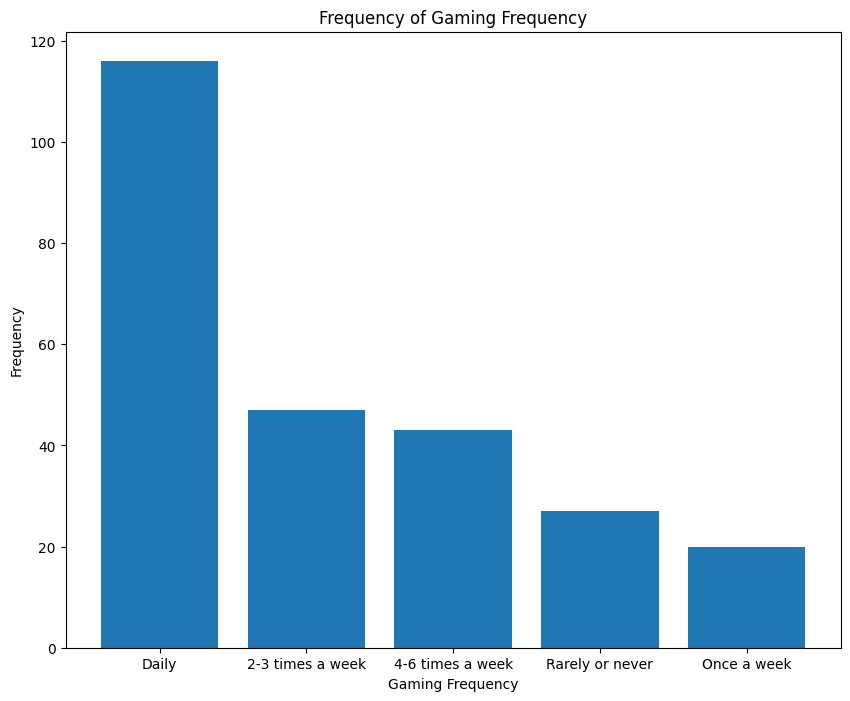

In [7]:
# Count the frequency of gaming frequency
Gaming_Frequency = dataset['Gaming_Frequency'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred genres
plt.figure(figsize=(10, 8))
plt.bar(Gaming_Frequency.index, Gaming_Frequency.values)
plt.title('Frequency of Gaming Frequency')
plt.xlabel('Gaming Frequency')
plt.ylabel('Frequency')
plt.show()

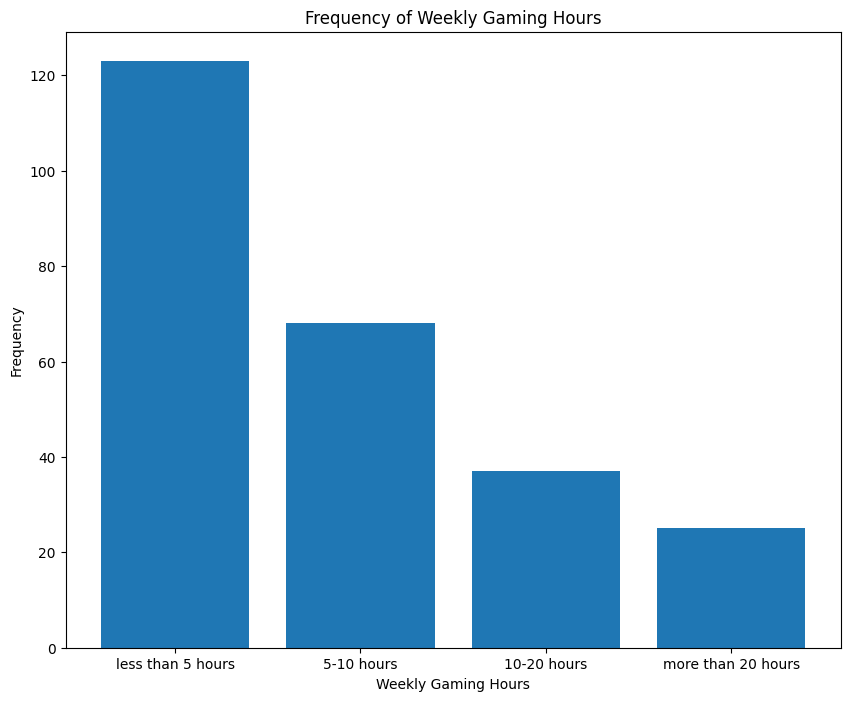

In [8]:
# Count the frequency of weekly gaming hours
Weekly_Gaming_Hours = dataset['Weekly_Gaming_Hours'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred genres
plt.figure(figsize=(10, 8))
plt.bar(Weekly_Gaming_Hours.index, Weekly_Gaming_Hours.values)
plt.title('Frequency of Weekly Gaming Hours')
plt.xlabel('Weekly Gaming Hours')
plt.ylabel('Frequency')
plt.show()

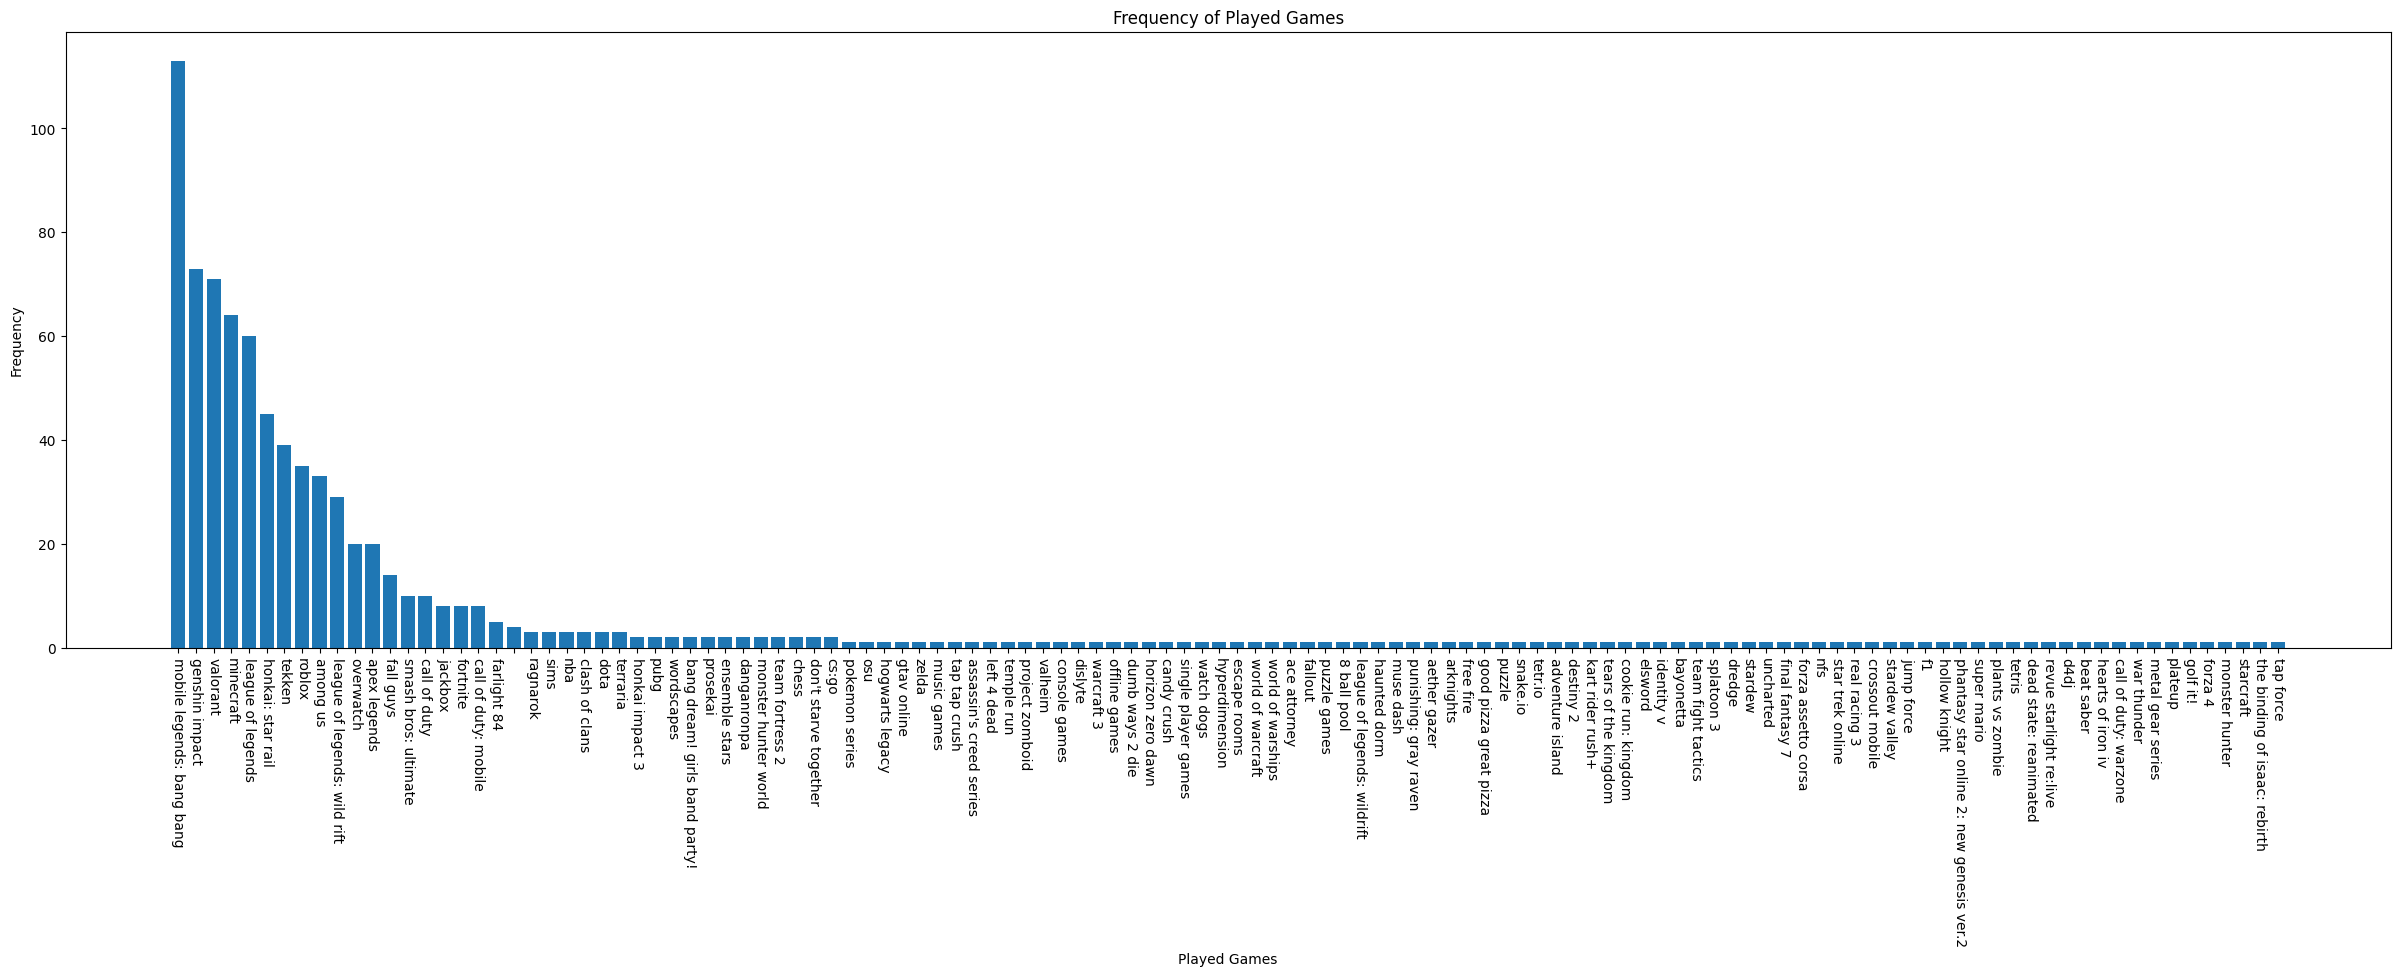

In [9]:
# Count the frequency of played games
Played_Games = dataset['Played_Games'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred genres
plt.figure(figsize=(30, 8))
plt.bar(Played_Games.index, Played_Games.values)
plt.title('Frequency of Played Games')
plt.xlabel('Played Games')
plt.ylabel('Frequency')
plt.xticks(rotation=-90)
plt.show()

In [10]:
# Check the unique values in y
unique_values, counts = np.unique(target_variable, return_counts=True)

# Identify rows to drop
rows_to_keep = np.isin(target_variable, unique_values[counts > 1])

# Drop rows
features_filtered = features[rows_to_keep]
target_variable_filtered = target_variable[rows_to_keep]
dataset = dataset[rows_to_keep]

In [11]:
# Split the data set into Training and Test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_filtered
                                                    , target_variable_filtered
                                                    , test_size = 0.35
                                                    , random_state = 0
                                                    , stratify=target_variable_filtered)

In [12]:
# Normalization of data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# User input to determine Classifer to use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

invalid_input = True
checkForLogRegChoice = False
# Loop until valid input is provided
while invalid_input:
    # User input
    comparison_input = input(
        "Choose a model (knn or logistic):\n"
        "a. KNN\n"
        "b. Logistic\n"
    )
    match comparison_input:
        # If the user chooses 'A' or 'a' (KNN)
        case 'A'| 'a':
            invalid_input = False
            # Create a KNN classifier
            classifier = KNeighborsClassifier (n_neighbors=5)
            classifier.fit(X_train, y_train)
        # If the user chooses 'B' or 'b' (Logistic Regression)
        case 'B'| 'b':
            checkForLogRegChoice = True
            invalid_input = False
            # Create a Logistic Regression classifier
            classifier = LogisticRegression(random_state = 0, max_iter=10000)
            classifier.fit(X_train, y_train)


In [14]:
# Predict using the classifier on the training set
y_pred_train = classifier.predict(X_train)

# Concatenate the predicted values and the actual values
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1)
                      , y_train.reshape(len(y_train),1))
                      ,1))



[[ 0 13]
 [13  7]
 [13  7]
 [ 7  2]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13  0]
 [13 13]
 [13 13]
 [13 13]
 [10 10]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [10 10]
 [ 7  7]
 [13 13]
 [ 0  1]
 [13 13]
 [ 7  7]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [ 1  1]
 [ 7  7]
 [ 2  9]
 [13  0]
 [13 10]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13  0]
 [13 13]
 [ 7  1]
 [10 10]
 [13 13]
 [ 1  1]
 [13  7]
 [ 7 10]
 [13 21]
 [13 13]
 [13 13]
 [ 1  1]
 [13 13]
 [13  7]
 [13 10]
 [13 13]
 [13 13]
 [ 1  1]
 [13  1]
 [13  1]
 [13 13]
 [13  1]
 [ 2  2]
 [10 10]
 [13 13]
 [13 19]
 [13 13]
 [13 13]
 [ 7  1]
 [10 13]
 [13  1]
 [ 7 10]
 [13 13]
 [ 7 10]
 [ 1  2]
 [13 13]
 [13 13]
 [ 1  1]
 [13 13]
 [13 13]
 [13  7]
 [13 13]
 [13  7]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [13  1]
 [13 13]
 [13 13]
 [13 15]
 [13 13]
 [13 13]
 [ 7 10]
 [13 13]
 [ 2  1]
 [13 13]
 [13 21]
 [13 13]
 [13 13]
 [13  1]
 [ 7  1]
 [13 13]
 [13 18]
 [ 7  2]
 [13 13]
 [13 13]
 [13 15]
 

In [15]:
# Predict using the classifier on the test set
y_pred_test = classifier.predict(X_test)

# Concatenate the predicted values and the actual values
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1)
                      , y_test.reshape(len(y_test),1))
                      ,1))

[[13 13]
 [ 7 13]
 [13  7]
 [13  9]
 [ 7  1]
 [13 10]
 [13  2]
 [13 13]
 [ 2 19]
 [13 13]
 [13 13]
 [ 1  7]
 [ 0 13]
 [13 13]
 [13 21]
 [13 13]
 [13 13]
 [ 1 10]
 [13 13]
 [ 2  0]
 [ 1 10]
 [13 13]
 [13  7]
 [13  1]
 [13 13]
 [13 13]
 [13  2]
 [13 10]
 [13 13]
 [13 13]
 [13 13]
 [13  1]
 [13 13]
 [13 13]
 [ 2  1]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [ 1  0]
 [13  1]
 [13 13]
 [13  6]
 [13 13]
 [13  7]
 [13  0]
 [ 7  1]
 [13 13]
 [13 13]
 [13 13]
 [13 13]
 [10 10]
 [ 7  7]
 [13 13]
 [13 13]
 [13 10]
 [13  7]
 [ 1  7]
 [13 13]
 [13 10]
 [ 1 15]
 [13 20]
 [ 7 19]
 [13 11]
 [13  1]
 [10  7]
 [ 2  7]
 [13 13]
 [13  2]
 [13 13]
 [13 13]
 [13 13]
 [13  1]
 [13 13]
 [ 7  7]
 [ 7  1]
 [13 18]
 [ 2  1]
 [13 13]
 [13 13]
 [13 13]
 [13  2]
 [13 13]
 [13 13]
 [13 13]
 [13 13]]


In [16]:
# Accuracy Scores

print("Accuracy Scores for training prediction and training data:", accuracy_score(y_pred_train, y_train))
print("")
print("Accuracy Scores for test prediction and test data:", accuracy_score(y_pred_test, y_test))

Accuracy Scores for training prediction and training data: 0.6037735849056604

Accuracy Scores for test prediction and test data: 0.5116279069767442


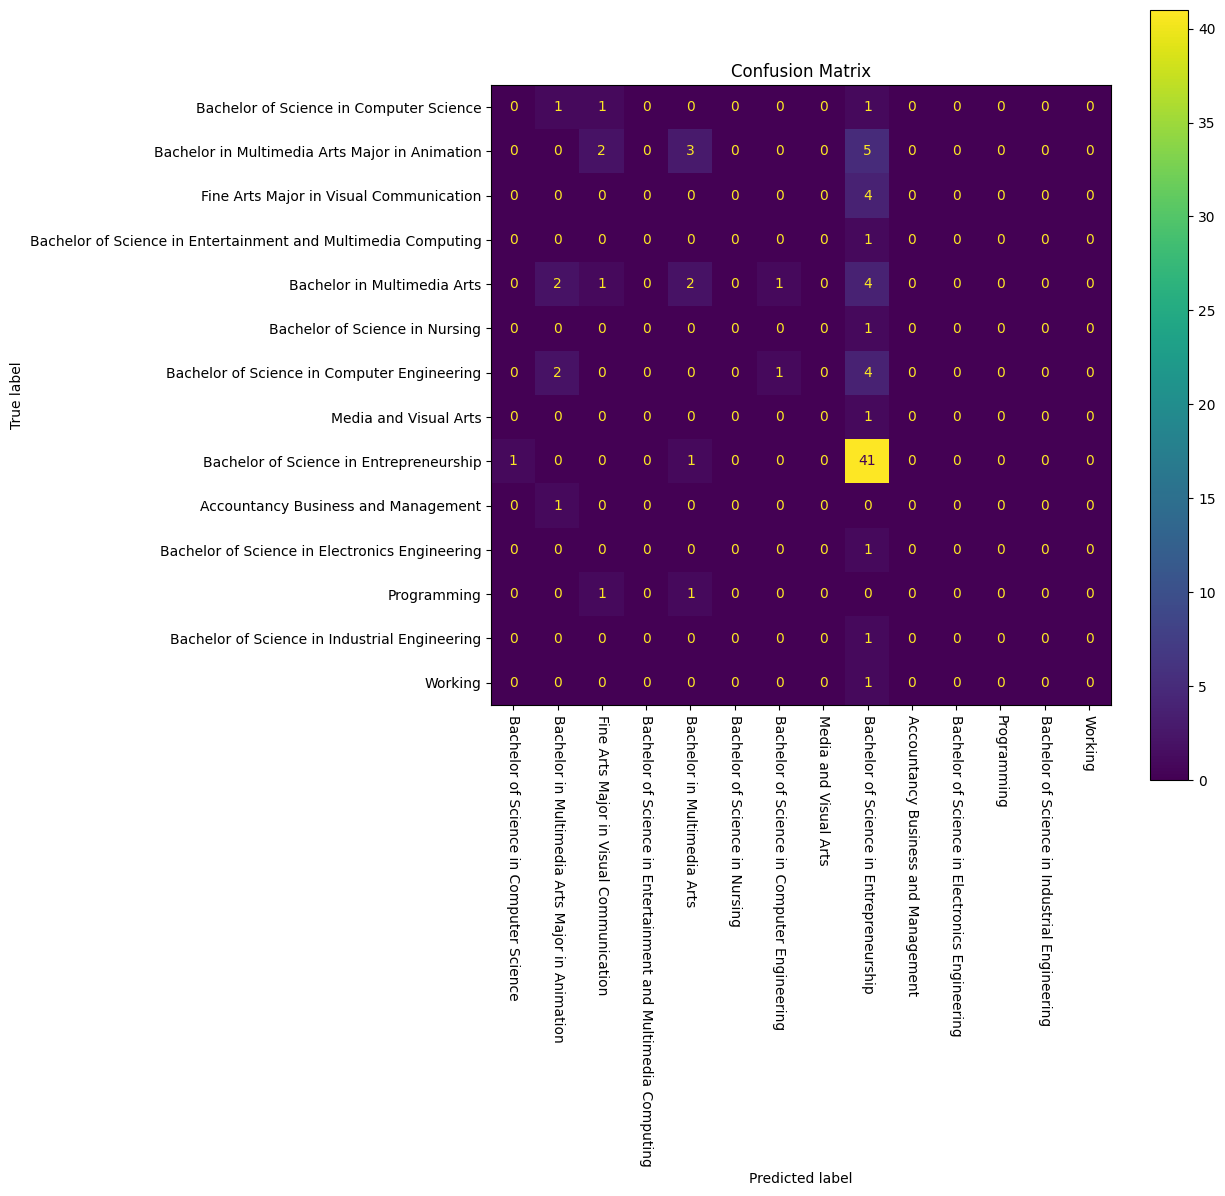

In [17]:
# Plot Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset['Course/Strand'].unique())
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=-90)
plt.show()

In [18]:
# Function for User Inputs

def get_user_inputs(one_hot_encoded_data, max_length, num_columns):

    # Initialize an empty list to store user inputs
    user_inputs = []

    # Continue getting user inputs until the maximum length is reached or the user decides to stop
    while len(user_inputs) < max_length:
        try:
            # Prompt the user to enter a number or 'N' to end
            value = input(f"Enter a number (1-{num_columns}) or 'N' to end: ")

            # If the user enters 'N', exit the loop
            if value.lower() == 'n':
                break

            # Convert the input to an integer
            number = int(value)

            # Check if the entered number is within the valid range
            if 1 <= number <= num_columns:
                # Check for duplicate inputs
                if number not in user_inputs:
                    user_inputs.append(number)
                else:
                    print("Duplicate input. Please enter a unique number.")
            else:
                print(f"Please enter a number between 1 and {num_columns}.")
        except ValueError:
            print("Invalid input. Please enter a valid number or 'stop'.")

    # Get corresponding column names for the selected numbers
    corresponding_values = [one_hot_encoded_data.columns.tolist()[i - 1] for i in user_inputs]

    # Create a DataFrame for user inputs
    df_user_inputs = pd.DataFrame({col: 0 for col in one_hot_encoded_data.columns}, index=[0])

    # Set the corresponding values to 1
    df_user_inputs.loc[0, corresponding_values] = 1

    return df_user_inputs

In [19]:
# Enumerate through the gaming platform columns then print the index and the gaming platform choice
for index, choice in enumerate(one_hot_encoded_gaming_platforms_columns, start=1):
    print(f"{index}. {choice}")

1. arcade
2. console
3. mobile
4. pc
5. virtual reality (vr)


In [20]:
# Get the user input for Gaming Platforms
one_hot_encoded_gaming_platforms_input = get_user_inputs(one_hot_encoded_gaming_platforms, one_hot_encoded_gaming_platforms_max_length, one_hot_encoded_gaming_platforms_num_columns)

In [21]:
# Enumerate through the weekly gaming hours columns then print the index and the weekly gaming hours choice
for index, choice in enumerate(one_hot_encoded_weekly_gaming_hours_columns, start=1):
    print(f"{index}. {choice}")

1. 10-20 hours
2. 5-10 hours
3. less than 5 hours
4. more than 20 hours


In [22]:
# Get the user input for Weekly Gaming Hours
one_hot_encoded_weekly_gaming_hours_input = get_user_inputs(one_hot_encoded_weekly_gaming_hours, one_hot_encoded_weekly_gaming_hours_max_length, one_hot_encoded_weekly_gaming_hours_num_columns)

In [23]:
# Enumerate through the played games columns then print the index and the played games choice
for index, choice in enumerate(one_hot_encoded_played_games_columns, start=1):
    print(f"{index}. {choice}")

1. 8 ball pool
2. ace attorney
3. adventure island
4. aether gazer
5. among us
6. apex legends
7. arknights
8. assassin's creed series
9. bang dream! girls band party!
10. bayonetta
11. beat saber
12. call of duty
13. call of duty: mobile
14. call of duty: warzone
15. candy crush
16. chess
17. clash of clans
18. console games
19. cookie run: kingdom
20. crossout mobile
21. cs:go
22. d4dj
23. danganronpa
24. dead state: reanimated
25. destiny 2
26. dislyte
27. don't starve together
28. dota
29. dredge
30. dumb ways 2 die
31. elsword
32. ensemble stars
33. escape rooms
34. f1
35. fall guys
36. fallout
37. farlight 84
38. final fantasy 7
39. fortnite
40. forza 4
41. forza assetto corsa
42. free fire
43. genshin impact
44. golf it!
45. good pizza great pizza
46. gtav online
47. haunted dorm
48. hearts of iron iv
49. hogwarts legacy
50. hollow knight
51. honkai impact 3
52. honkai: star rail
53. horizon zero dawn
54. hyperdimension
55. identity v
56. jackbox
57. jump force
58. kart rider ru

In [24]:
# Get the user input for Played Games
one_hot_encoded_played_games_input = get_user_inputs(one_hot_encoded_played_games, one_hot_encoded_played_games_max_length, one_hot_encoded_played_games_num_columns)

In [25]:
# Concatenate one-hot encoded user inputs
user_inputs = np.concatenate([one_hot_encoded_gaming_platforms_input, one_hot_encoded_weekly_gaming_hours_input, one_hot_encoded_played_games_input], axis=1)

1). By knowing the games they play, the number of hours, and the gaming console, determine what is the course of the user. 

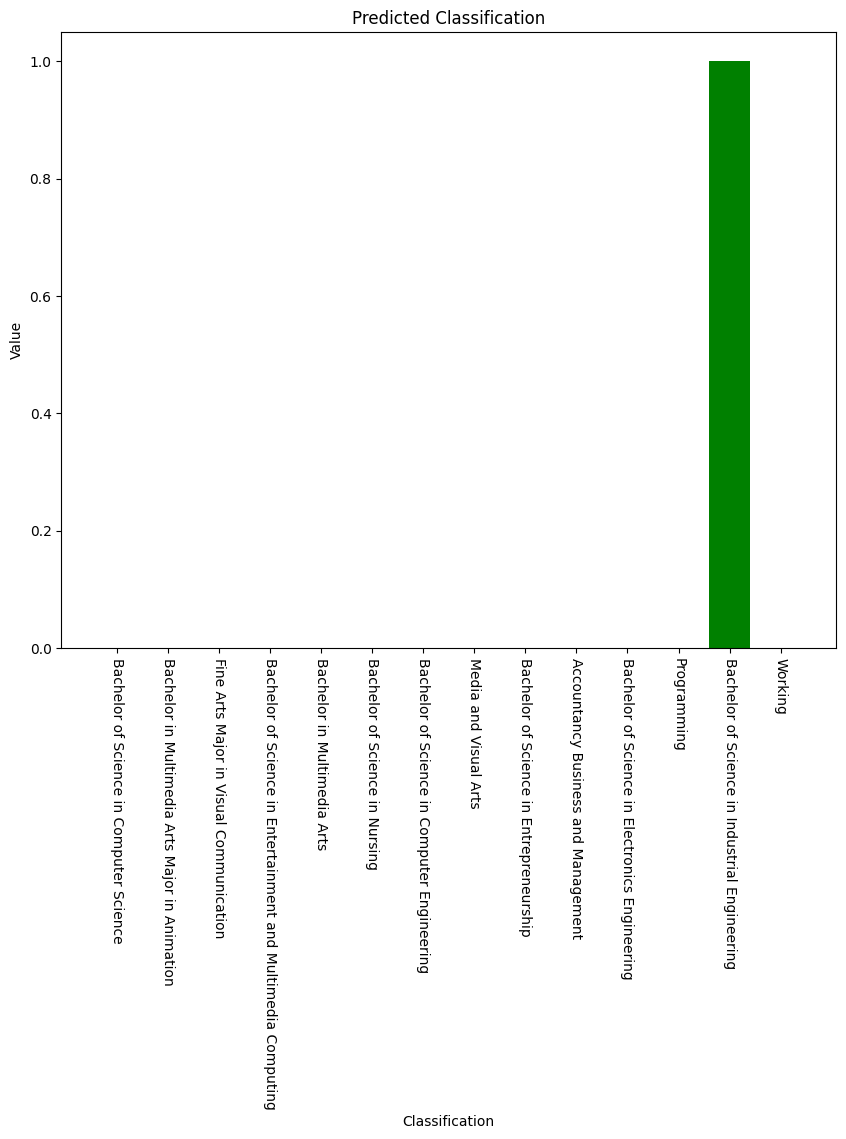

The predicted course is: Bachelor of Science in Industrial Engineering
Accuracy of the model:51.16%
Precision of the model: 49.40%
Recall of the model: 51.16%
F1 Score of the model: 62.28%


In [26]:
# Prediction Based on User Input and Created Metrics

headers = label_encoder.inverse_transform(target_variable_filtered)

# Predict the result and the probabilities
predicted_result = classifier.predict(user_inputs)
predicted_classification_probabilities = classifier.predict_proba(user_inputs)

# Create a vector representation of the predicted class
predicted_vector = np.zeros(len(label_encoder.inverse_transform(target_variable_filtered)))
predicted_vector[np.where(label_encoder.inverse_transform(target_variable_filtered) == label_encoder.inverse_transform([predicted_result[0]])[0])] = 1

# Create a bar chart to visualize the prediction
plt.figure(figsize=(10, 8))
plt.bar(label_encoder.inverse_transform(target_variable_filtered), predicted_vector, color=['green' if val else 'red' for val in predicted_vector])
plt.xlabel('Classification')
plt.ylabel('Value')
plt.title('Predicted Classification')
plt.xticks(rotation=-90)
plt.show()

# Print the predicted classification
print(f"The predicted course is: {label_encoder.inverse_transform([predicted_result[0]])[0]}")

# Calculate and print the accuracy of the model
print(f"Accuracy of the model:{(accuracy_score(y_test, classifier.predict(X_test)) * 100):.2f}%")

# Calculate and print the precision of the model
print(f"Precision of the model: {(precision_score(y_test, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

# Calculate and print the recall of the model
print(f"Recall of the model: {(recall_score(y_test, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

# Calculate and print the F1 Score of the model
print(f"F1 Score of the model: {(f1_score(y_test, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

Probability of being Accountancy Business and Management: 0.00%
Probability of being Bachelor in Multimedia Arts: 0.00%
Probability of being Bachelor in Multimedia Arts Major in Animation: 0.00%
Probability of being Bachelor of Science in Computer Engineering: 0.00%
Probability of being Bachelor of Science in Computer Science: 0.00%
Probability of being Bachelor of Science in Electronics Engineering: 0.00%
Probability of being Bachelor of Science in Entertainment and Multimedia Computing: 0.00%
Probability of being Bachelor of Science in Entrepreneurship: 0.00%
Probability of being Bachelor of Science in Industrial Engineering: 100.00%
Probability of being Bachelor of Science in Nursing: 0.00%
Probability of being Fine Arts Major in Visual Communication: 0.00%
Probability of being Media and Visual Arts: 0.00%
Probability of being Programming: 0.00%
Probability of being Working: 0.00%


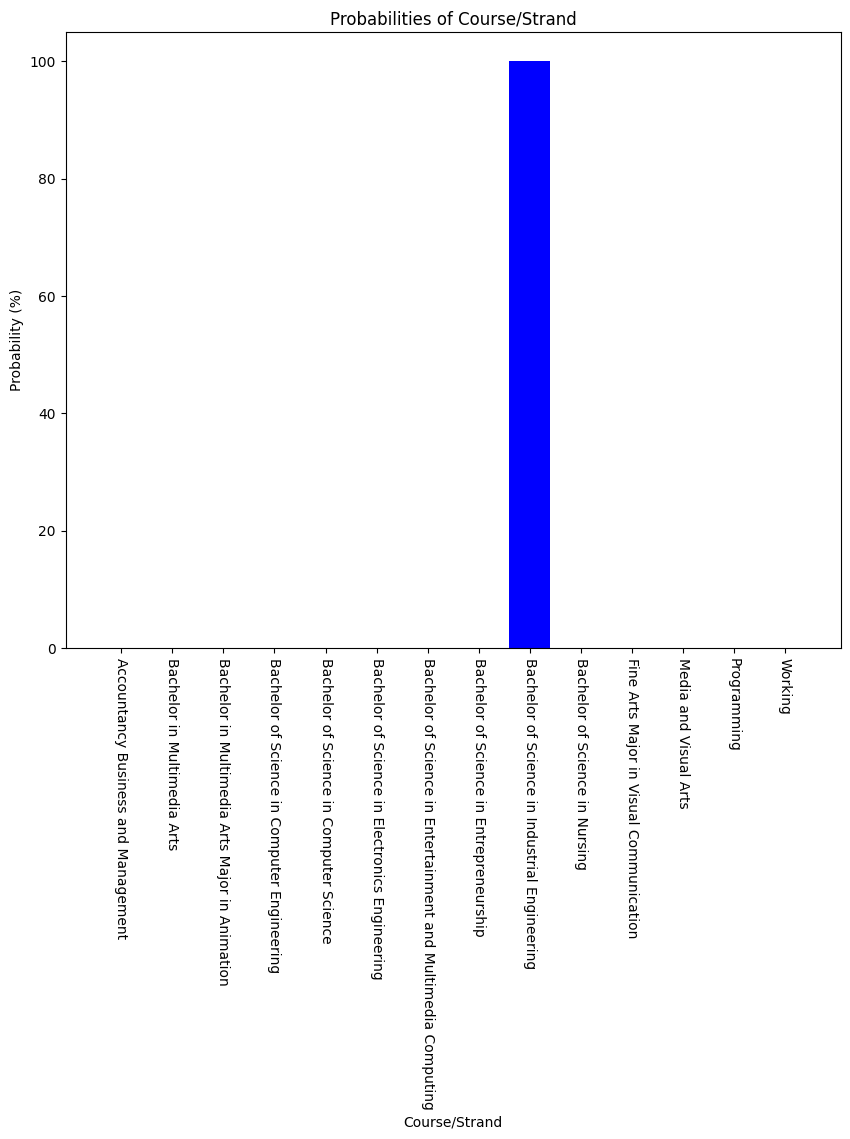

In [27]:
# Display Probabilities for Each Course

probabilities = []

# Print the probabilities for each class
for class_name, probability in zip(np.unique(label_encoder.inverse_transform(target_variable_filtered)), predicted_classification_probabilities[0]):
    print(f"Probability of being {class_name}: {(probability * 100):.2f}%")

    # Append the probability to the list for plotting
    probabilities.append(probability * 100)

# Create a bar graph to visualize probabilities for each class
plt.figure(figsize=(10, 8))
plt.bar(np.unique(label_encoder.inverse_transform(target_variable_filtered)), probabilities, color='blue')
plt.xlabel('Course/Strand')
plt.ylabel('Probability (%)')
plt.title('Probabilities of Course/Strand')
plt.xticks(rotation=-90)
plt.show()

Accuracy of the Models

KNN

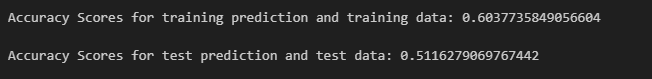

Logistic Regression

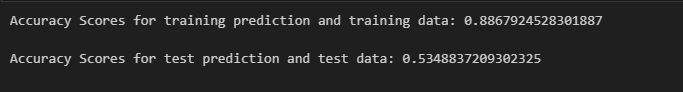

Which model is best suited for the problem?

Given the accuracy scores for KNN, we can see that there is little difference between the scores with the training data and the test data. This indicates that the model is somewhat reliable despite having low scores. 

However, for the accuracy scores of Logistic regression, we can see that there is a huge gap between the scores which suggests that the model may not be that reliable. This may be due to the dataset itself or its preprocessing

Given these accuracy scores, we recommend using the KNN model to make predictions on the dataset because of the small difference in the accuracy scores on the training data and the test data.

